In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [3]:

data = []
for i in os.listdir(os.getcwd()):
    if i.endswith('csv'):
        print(i, pd.read_csv(i).shape[0])
        data.append(pd.read_csv(i))

olist_customers_dataset.csv 99441
olist_geolocation_dataset.csv 1000163
olist_orders_dataset.csv 99441
olist_order_items_dataset.csv 112650
olist_order_payments_dataset.csv 103886
olist_order_reviews_dataset.csv 100000
olist_products_dataset.csv 32951
olist_sellers_dataset.csv 3095
product_category_name_translation.csv 71
sample_submission.csv 3068
test_data.csv 3069
train_data.csv 7160
VariableDescription.csv 14


In [4]:
data_customers = data[0]
data_geo = data[1]
data_orders = data[2]
data_items = data[3]
data_payments =data[4]
data_reviews = data[5]
data_products = data[6]
data_sellers = data[7]
translation_dic= data[8]

In [5]:
data_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
data_geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [7]:
data_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
data_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
data_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [12]:
data_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [13]:
data_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [14]:
data_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [15]:
data_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [16]:
data_items['product_id'].nunique()

32951

In [17]:
data_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [18]:
# Converting the date column to datetime and assignig the dataframe to a new variable "orders"

columns = data_orders.columns[3:]
orders = data_orders.copy()
for column in columns:
    orders[column]= pd.to_datetime(orders[column])

In [19]:
# Getting the delivery time

#orders['approval time elapse'] = (orders['order_approved_at'] - orders['order_purchase_timestamp']).dt.days
orders['delivery time elapse'] = (orders['order_delivered_customer_date'] - orders['order_delivered_carrier_date']).dt.days

In [20]:
# Merging orders dataset with some selected columns customers dataset

customer_list = ['customer_id', 'customer_unique_id','customer_state', 'customer_city', 'customer_zip_code_prefix']
orders_mod = orders.merge(data_customers[customer_list], how='left', on ='customer_id')

In [21]:
orders_mod.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery time elapse,customer_unique_id,customer_state,customer_city,customer_zip_code_prefix
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,SP,sao paulo,3149
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,BA,barreiras,47813
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,GO,vianopolis,75265
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,7c142cf63193a1473d2e66489a9ae977,RN,sao goncalo do amarante,59296
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,72632f0f9dd73dfee390c9b22eb56dd6,SP,santo andre,9195


In [22]:
# Merging orders dataset with some selected columns in orders_items dataset

new_data_items = data_items.drop_duplicates('order_id', keep='last').reset_index(drop=False)
merger_list = ['seller_id', 'freight_value', 'order_id', 'product_id', 'price', 'order_item_id']
orders_mod = orders_mod.merge(new_data_items[merger_list], how='left', on='order_id')

In [23]:
orders_mod.shape

(99441, 18)

In [24]:
# dropping the dupliicate zip code prefic, so that any merger would be done accurately
geo = data_geo.drop_duplicates('geolocation_zip_code_prefix')

geo.shape

(19015, 5)

In [25]:
# merging the sellers dataset to the geo dataset obtained to get the locations of the sellers
sellers_geo = data_sellers.merge(geo, 
                                 how='left', 
                                 left_on ='seller_zip_code_prefix', 
                                 right_on='geolocation_zip_code_prefix')

In [26]:
sellers_geo.shape

(3095, 9)

In [27]:
# Merging the orders dataset with the geo dataset to get the locations of the customers

geo_merger_list=['geolocation_zip_code_prefix',
                 'geolocation_lng', 
                 'geolocation_lat']
orders_mod = orders_mod.merge(geo[geo_merger_list],
                 how='left', 
                 left_on='customer_zip_code_prefix',
                 right_on='geolocation_zip_code_prefix')

In [28]:
orders_mod.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery time elapse,customer_unique_id,...,customer_city,customer_zip_code_prefix,seller_id,freight_value,product_id,price,order_item_id,geolocation_zip_code_prefix,geolocation_lng,geolocation_lat
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,sao paulo,3149,3504c0cb71d7fa48d967e0e4c94d59d9,8.72,87285b34884572647811a353c7ac498a,29.99,1.0,3149.0,-46.587471,-23.574809
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,...,barreiras,47813,289cdb325fb7e7f891c38608bf9e0962,22.76,595fac2a385ac33a80bd5114aec74eb8,118.70,1.0,47813.0,-44.988369,-12.169860
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,vianopolis,75265,4869f7a5dfa277a7dca6462dcf3b52b2,19.22,aa4383b373c6aca5d8797843e5594415,159.90,1.0,75265.0,-48.514624,-16.746337


In [29]:
# Merging sellers dataset containing sellers location with the ordwers dataset
# so that the sellers_id in the orders dataset would have their respective locations

seller_merger_list=['seller_zip_code_prefix',
                    'seller_id',
                 'geolocation_lng', 
                 'geolocation_lat']
orders_mod = orders_mod.merge(sellers_geo[seller_merger_list],
                              how='left', 
                              on='seller_id', 
                              suffixes = ('_cust', '_seller'))

In [30]:
#Merging products dataset with orders dataset

product_merger_list = ['product_id', 'product_weight_g']
orders_mod= orders_mod.merge(data_products, how='left', on='product_id')

In [31]:
orders_mod.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery time elapse,customer_unique_id,...,geolocation_lng_seller,geolocation_lat_seller,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,-46.452454,-23.680114,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,...,-43.984727,-19.810119,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,-48.232976,-21.362358,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,7c142cf63193a1473d2e66489a9ae977,...,-43.923299,-19.840168,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,72632f0f9dd73dfee390c9b22eb56dd6,...,-46.260979,-23.551707,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [32]:
orders_mod.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delivery time elapse', 'customer_unique_id', 'customer_state',
       'customer_city', 'customer_zip_code_prefix', 'seller_id',
       'freight_value', 'product_id', 'price', 'order_item_id',
       'geolocation_zip_code_prefix', 'geolocation_lng_cust',
       'geolocation_lat_cust', 'seller_zip_code_prefix',
       'geolocation_lng_seller', 'geolocation_lat_seller',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [33]:
# defining a finction that will calculate distance bewteen seller and customer

from math import sin, cos, atan, sqrt, radians, asin

def calc_distance(col):
    xc = radians(col[0])
    yc = radians(col[1])
    xs = radians(col[2])
    ys = radians(col[3])
    dlon =  xs - xc
    dlat = ys - yc
    a = sin(dlat/2)**2 + cos(yc) * cos(ys) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371
    
    
    return (c * r)

In [34]:
# Applying the function to the merger that we created

XY = ['geolocation_lng_cust',
           'geolocation_lat_cust',
           'geolocation_lng_seller',
           'geolocation_lat_seller',]
orders_mod['distance'] = orders_mod[XY].apply(calc_distance, axis=1)

In [35]:
orders_mod.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delivery time elapse', 'customer_unique_id', 'customer_state',
       'customer_city', 'customer_zip_code_prefix', 'seller_id',
       'freight_value', 'product_id', 'price', 'order_item_id',
       'geolocation_zip_code_prefix', 'geolocation_lng_cust',
       'geolocation_lat_cust', 'seller_zip_code_prefix',
       'geolocation_lng_seller', 'geolocation_lat_seller',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'distance'],
      dtype='object')

In [36]:
# adding year column in  th dataset
orders_mod['year'] = orders_mod['order_purchase_timestamp'].dt.year

In [37]:
# adding dayname to the dataset

import datetime
import calendar
def findday(date):
    #day = datetime.datetime.strptime(date, '%y %m %d %H %M %S').weekday()
    return (calendar.day_name[date.weekday()])
orders_mod['dayname'] = orders_mod['order_purchase_timestamp'].apply(findday)

In [38]:
# Adding day of year for each purchase to the dataset
orders_mod['day_of_year'] = orders_mod['order_purchase_timestamp'].dt.dayofyear

In [39]:
orders_mod.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delivery time elapse', 'customer_unique_id', 'customer_state',
       'customer_city', 'customer_zip_code_prefix', 'seller_id',
       'freight_value', 'product_id', 'price', 'order_item_id',
       'geolocation_zip_code_prefix', 'geolocation_lng_cust',
       'geolocation_lat_cust', 'seller_zip_code_prefix',
       'geolocation_lng_seller', 'geolocation_lat_seller',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'distance', 'year', 'dayname', 'day_of_year'],
      dtype='object')

In [40]:
orders_mod.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery time elapse,customer_unique_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,distance,year,dayname,day_of_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,268.0,4.0,500.0,19.0,8.0,13.0,18.063837,2017,Monday,275
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,...,178.0,1.0,400.0,19.0,13.0,19.0,856.292580,2018,Tuesday,205
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,232.0,1.0,420.0,24.0,19.0,21.0,514.130333,2018,Wednesday,220
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,7c142cf63193a1473d2e66489a9ae977,...,468.0,3.0,450.0,30.0,10.0,20.0,1822.800366,2017,Saturday,322
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,72632f0f9dd73dfee390c9b22eb56dd6,...,316.0,4.0,250.0,51.0,15.0,15.0,30.174037,2018,Tuesday,44


In [41]:
translation_dic.shape

(71, 2)

In [42]:
orders_mod['product_category_name'].nunique()

73

In [43]:
orders_mod['product_category_name'].isnull().sum()

2193

In [44]:
data_products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [45]:

orders_mod = orders_mod.merge(translation_dic, how='left', on='product_category_name')

### EDA FOR SELLERS

In [46]:
# we want to get the very first sales of each seller_id
#This gives an idea of when each seller started selling in OLIST

sell_analysis = orders_mod.groupby('seller_id')['order_purchase_timestamp'].min().reset_index()

In [47]:
# Coverting the time stamp to a string
sell_analysis['timestamp_string'] = sell_analysis['order_purchase_timestamp'].astype(str)

In [48]:
# EXtracting the year and month from the timestamp for the purpose of monthly analysis

sell_analysis['year_day'] = sell_analysis['timestamp_string'].apply(lambda x : '-'.join(x.split('-')[:2]))
sell_analysis

,seller_id,order_purchase_timestamp,timestamp_string,year_day
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-09-26 22:17:05,2017-09-26 22:17:05,2017-09
1,001cca7ae9ae17fb1caed9dfb1094831,2017-02-04 19:06:04,2017-02-04 19:06:04,2017-02
2,001e6ad469a905060d959994f1b41e4f,2018-08-07 22:50:37,2018-08-07 22:50:37,2018-08
3,002100f778ceb8431b7a1020ff7ab48f,2017-09-14 01:00:31,2017-09-14 01:00:31,2017-09
4,003554e2dce176b5555353e4f3555ac8,2017-12-15 06:52:25,2017-12-15 06:52:25,2017-12
...,...,...,...,...
3079,ffcfefa19b08742c5d315f2791395ee5,2018-06-23 17:34:33,2018-06-23 17:34:33,2018-06
3080,ffdd9f82b9a447f6f8d4b91554cc7dd3,2017-03-05 16:21:27,2017-03-05 16:21:27,2017-03
3081,ffeee66ac5d5a62fe688b9d26f83f534,2017-09-30 15:56:56,2017-09-30 15:56:56,2017-09
3082,fffd5413c0700ac820c7069d66d98c89,2017-07-24 21:13:55,2017-07-24 21:13:55,2017-07


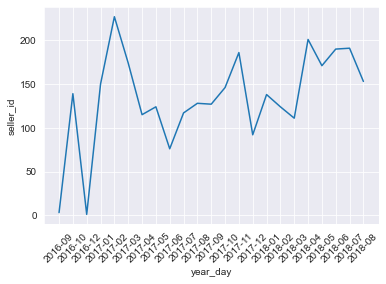

In [49]:
# getting the peculiar addition of sellers to OLIST without any cummulative addition
sns.set_style('darkgrid')
plot = sell_analysis.groupby('year_day')['seller_id'].count().reset_index()

sns.lineplot(x='year_day', y='seller_id', data=plot)

plt.xticks(rotation=45)
plt.show()

#### OBSERVATIONS
- `The monthly addition of peculiar sellers doesnt follow any particular pattern from the lineplot`

In [50]:
orders_mod.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delivery time elapse', 'customer_unique_id', 'customer_state',
       'customer_city', 'customer_zip_code_prefix', 'seller_id',
       'freight_value', 'product_id', 'price', 'order_item_id',
       'geolocation_zip_code_prefix', 'geolocation_lng_cust',
       'geolocation_lat_cust', 'seller_zip_code_prefix',
       'geolocation_lng_seller', 'geolocation_lat_seller',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'distance', 'year', 'dayname', 'day_of_year',
       'product_category_name_english'],
      dtype='object')

In [51]:
price_analysis = orders_mod[['order_id', 'order_item_id', 'price', 'seller_id', 'order_status', 'order_purchase_timestamp', 'product_category_name_english', 'product_category_name', 'customer_state', 'customer_city']]

<AxesSubplot:xlabel='order_status', ylabel='count'>

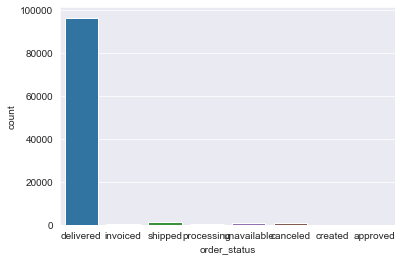

In [52]:
sns.countplot(x='order_status', data= price_analysis)

In [150]:
'guy how far_the level'.split(' ')

['guy', 'how', 'far_the', 'level']

In [151]:
# selecting only observations that have order status as delivered.
# These are the ones we are sure of the sales made

new_price_analysis = price_analysis[price_analysis['order_status'] == 'delivered']

new_price_analysis['total_price'] = new_price_analysis['order_item_id'] * new_price_analysis['price']

new_price_analysis['year_month'] = new_price_analysis['order_purchase_timestamp'].apply(lambda x : '-'.join(str(x).split('-')[:2]))

new_price_analysis

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,order_id,order_item_id,price,seller_id,order_status,order_purchase_timestamp,product_category_name_english,product_category_name,customer_state,customer_city,total_price,year_month
0,e481f51cbdc54678b7cc49136f2d6af7,1.0,29.99,3504c0cb71d7fa48d967e0e4c94d59d9,delivered,2017-10-02 10:56:33,housewares,utilidades_domesticas,SP,sao paulo,29.99,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,1.0,118.70,289cdb325fb7e7f891c38608bf9e0962,delivered,2018-07-24 20:41:37,perfumery,perfumaria,BA,barreiras,118.70,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,1.0,159.90,4869f7a5dfa277a7dca6462dcf3b52b2,delivered,2018-08-08 08:38:49,auto,automotivo,GO,vianopolis,159.90,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,1.0,45.00,66922902710d126a0e7d26b0e3805106,delivered,2017-11-18 19:28:06,pet_shop,pet_shop,RN,sao goncalo do amarante,45.00,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,1.0,19.90,2c9e548be18521d1c43cde1c582c6de8,delivered,2018-02-13 21:18:39,stationery,papelaria,SP,santo andre,19.90,2018-02
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,1.0,72.00,e24fc9fcd865784fb25705606fe3dfe7,delivered,2017-03-09 09:54:05,health_beauty,beleza_saude,SP,sao jose dos campos,72.00,2017-03
99437,63943bddc261676b46f01ca7ac2f7bd8,1.0,174.90,1f9ab4708f3056ede07124aad39a2554,delivered,2018-02-06 12:58:58,baby,bebes,SP,praia grande,174.90,2018-02
99438,83c1379a015df1e13d02aae0204711ab,1.0,205.99,d50d79cb34e38265a8649c383dcffd48,delivered,2017-08-27 14:46:43,home_appliances_2,eletrodomesticos_2,BA,nova vicosa,205.99,2017-08
99439,11c177c8e97725db2631073c19f07b62,2.0,179.99,a1043bafd471dff536d0c462352beb48,delivered,2018-01-08 21:28:27,computers_accessories,informatica_acessorios,RJ,japuiba,359.98,2018-01


,year_month,total_price
0,2016-09,134.97
1,2016-10,40585.31
2,2016-12,10.90
3,2017-01,111280.29
4,2017-02,233788.46
5,2017-03,358989.35
6,2017-04,341411.67
7,2017-05,487456.03
8,2017-06,422977.58
9,2017-07,480353.43


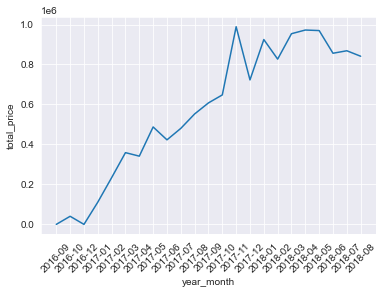

In [152]:
# Plotting the trend of prices/sales through all the years
display(new_price_analysis.groupby('year_month')['total_price'].sum().reset_index().head(10))

sns.lineplot(x='year_month', 
             y='total_price',
             data = new_price_analysis.groupby('year_month')['total_price'].sum().reset_index())

plt.xticks(rotation = 45)
plt.show()

,year_month,order_id
0,2016-09,1
1,2016-10,265
2,2016-12,1
3,2017-01,750
4,2017-02,1653


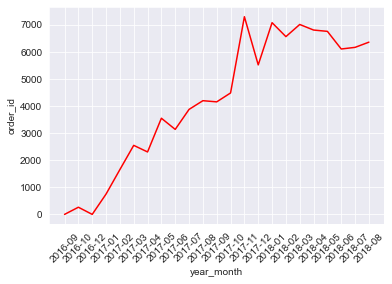

In [153]:
#  CHECKING THE TREND FOR ORDERS ACROSS ALL THE MONTHS SINCE OLIST STARTED AT 2016

display(new_price_analysis.groupby('year_month')['order_id'].count().reset_index().head())
sns.set_style('darkgrid')
sns.lineplot(x='year_month', 
             y='order_id', 
             data= new_price_analysis.groupby('year_month')['order_id'].count().reset_index(), 
             color='red')
plt.xticks(rotation = 45)

plt.show()

#### OBSERVATIONS:
- `The Trend of orders and the Trend of Sales/Prices are so alike. This could mean they have a direct relationship`  


- `There was a significant increase the both Total prices and orders between the month of October, 2017 and November, 2017`  


- `The trends kept increasing as the months went by and then reached a peak(November, 2017) and somewhat plateaued at that point`

,year_month,seller_id
0,2016-09,1
1,2016-10,126
2,2016-12,1
3,2017-01,218
4,2017-02,398
5,2017-03,476
6,2017-04,485
7,2017-05,561
8,2017-06,517
9,2017-07,592


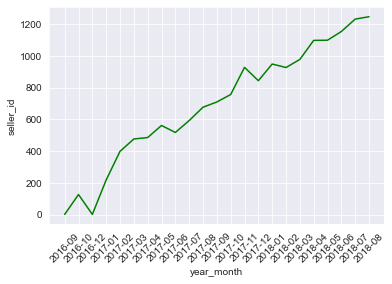

In [154]:

display(new_price_analysis.groupby('year_month')['seller_id'].apply(lambda x: len(set(x.to_list()))).reset_index().head(10))
sns.lineplot(x='year_month', 
             y='seller_id', 
             data= new_price_analysis.groupby('year_month')['seller_id'].apply(lambda x: len(set(x.to_list()))).reset_index(), 
             color='green')
plt.xticks(rotation = 45)
plt.show()

Text(0.5, 0, 'Product_category_name')

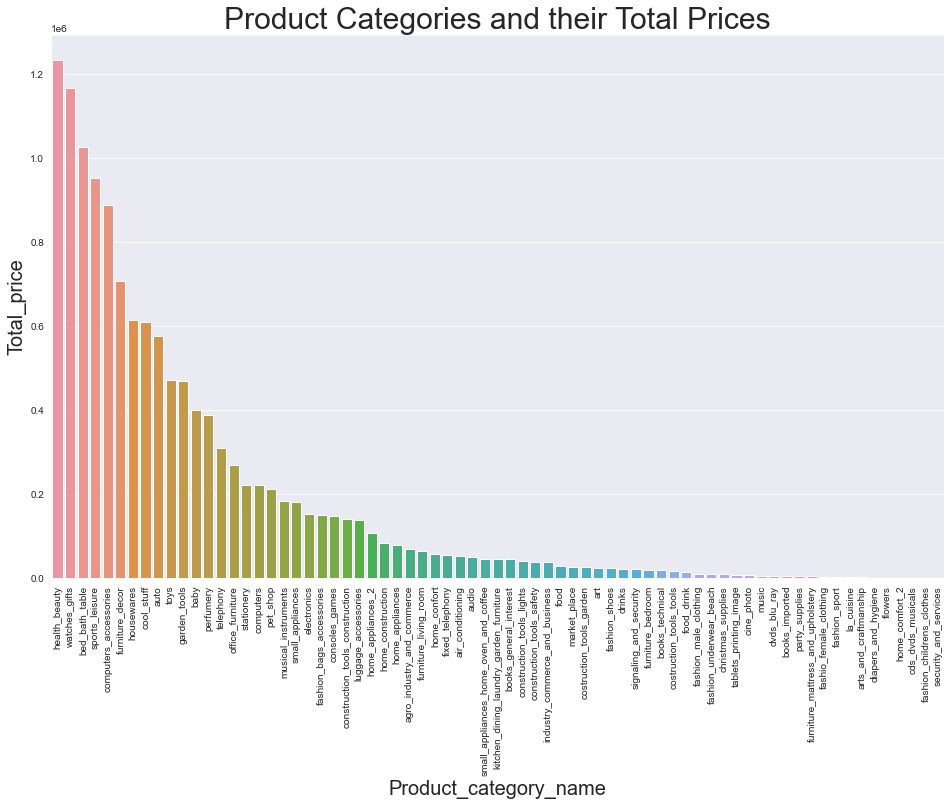

In [57]:
product_vs_price = new_price_analysis.groupby('product_category_name_english')['total_price'].sum().reset_index().sort_values('total_price', ascending = False)

plt.figure(figsize = (16,10))

sns.barplot(x='product_category_name_english', 
            y='total_price', 
            data= product_vs_price)

plt.xticks(rotation = 90)

plt.title('Product Categories and their Total Prices', fontsize=30)

plt.ylabel('Total_price', fontsize=20)

plt.xlabel('Product_category_name', fontsize=20)

### THE PARETO PRINCIPLE  

`The pareto principle states that 80% of consequences come from 20% of the causes`

**In business, it can be said that 20% of products give 80% of the profit of the business. We will therefore investigate this**

In [58]:
# The top seventeen happens to be responsible for approximately 80 percent of the profit

top_17 = product_vs_price.head(17)['product_category_name_english'].to_list()

top_17_sum = product_vs_price[product_vs_price['product_category_name_english'].isin(top_17)]['total_price'].sum()

top_17_sum/product_vs_price['total_price'].sum() * 100

80.77032845895175

In [59]:
print(top_17)

['health_beauty', 'watches_gifts', 'bed_bath_table', 'sports_leisure', 'computers_accessories', 'furniture_decor', 'housewares', 'cool_stuff', 'auto', 'toys', 'garden_tools', 'baby', 'perfumery', 'telephony', 'office_furniture', 'stationery', 'computers']


#### _SEVENTEEN(17)_ out of 73 products are responsible for approximately 80 percent of the companies profit

#### The seventeen most important products are :
- 'health_beauty',
- 'watches_gifts',
- 'bed_bath_table',
- 'sports_leisure',
- 'computers_accessories',
- 'furniture_decor',
- 'housewares',
- 'cool_stuff',
- 'auto',
- 'toys',
- 'garden_tools',
- 'baby',
- 'perfumery',
- 'telephony',
- 'office_furniture',
- 'stationery',
- 'computers'

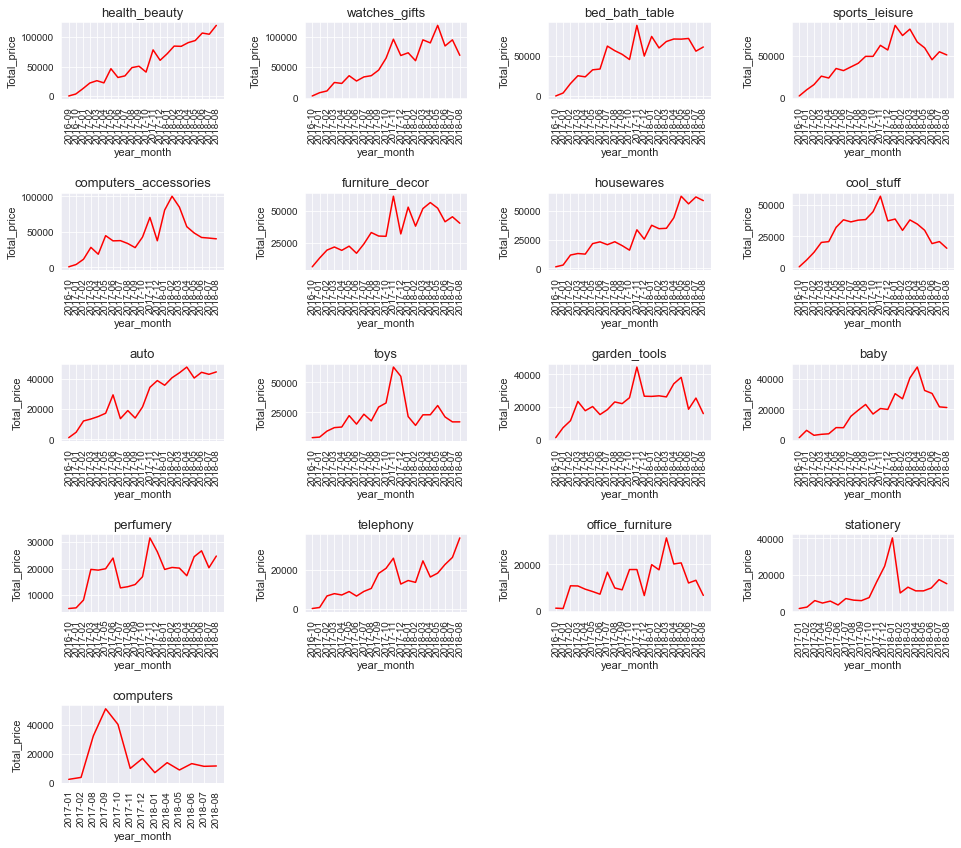

In [155]:
# CHECKING OUT THE TRENDS OF EACH OF THE SEVENTEEN MOST IMPORTANT PRODUCTS

category_df = new_price_analysis.groupby(['product_category_name_english', 'year_month'])['total_price'].sum().reset_index()
fig = plt.figure(figsize = (16, 14))
fig.subplots_adjust(hspace=1.2, wspace=0.5)
for i, cat in enumerate(top_17):
    ax = plt.subplot(5, 4, i+1)
    data = category_df[category_df['product_category_name_english']== cat]
    sns.lineplot(data['year_month'], data['total_price'], ax=ax, color='red')
    plt.xticks(rotation=90)
    plt.title(cat, fontsize= 13)
    plt.xlabel('year_month', fontsize=11)
    plt.ylabel('Total_price', fontsize=11)


#### OBSERVATIONS
- `Most of the products have trends that look like the ORDER and the TOTAL PRICES trend`  


- `They kept increasing until they got to a point and then they either stayed on that level till the end(2018) or they started going on a downward trend.`  

  
- `We will need to investigate some of the possible reasons`  

  
- `But before then, it is noteworthy that HEALTH_BEAUTY and HOUSEWARES keeps increasing as the months go by and hasn't experienced a plateau`

In [156]:
# GROUPING DATA BY YEAR_MONTH AND FOCUSING ON THE PRODUCT CATEGORY TO SEE HOW IT 
#INCREASED THROUGH THE MONTHS
month_vs_productcategory = new_price_analysis.groupby('year_month')['product_category_name_english'].agg({'set of products' : lambda x: list(x.value_counts().index),
                                                                            'number of products_1': lambda x: len(list(x.value_counts().index)),
                                                                            'number of products': lambda x : len(set(x.to_list()))}).reset_index()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """


In [157]:
# get sets of cumulative products

month_vs_productcategory['sets of cumm products'] = month_vs_productcategory['set of products']

for i in range(1, 23):
    month_vs_productcategory['sets of cumm products'][i] = list(set(month_vs_productcategory['sets of cumm products'][i] + month_vs_productcategory['sets of cumm products'][i - 1]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [158]:
#  get length of cummulative products
month_vs_productcategory['number of cummulative products'] = month_vs_productcategory['sets of cumm products'].apply(lambda x: len(x))

month_vs_productcategory

,year_month,set of products,number of products_1,number of products,sets of cumm products,number of cummulative products
0,2016-09,[health_beauty],1,1,[health_beauty],1
1,2016-10,"[furniture_decor, health_beauty, perfumery, to...",29,30,"[toys, food, fashio_female_clothing, houseware...",29
2,2016-12,[fashion_bags_accessories],1,1,"[toys, food, fashio_female_clothing, houseware...",29
3,2017-01,"[furniture_decor, health_beauty, sports_leisur...",42,43,"[toys, fashio_female_clothing, food, houseware...",45
4,2017-02,"[furniture_decor, health_beauty, bed_bath_tabl...",50,51,"[toys, food, fashio_female_clothing, houseware...",54
5,2017-03,"[furniture_decor, bed_bath_table, health_beaut...",52,53,"[toys, food, fashio_female_clothing, houseware...",59
6,2017-04,"[bed_bath_table, sports_leisure, health_beauty...",55,56,"[toys, food, fashio_female_clothing, houseware...",64
7,2017-05,"[bed_bath_table, health_beauty, housewares, sp...",58,59,"[toys, fashio_female_clothing, food, houseware...",66
8,2017-06,"[bed_bath_table, housewares, sports_leisure, h...",59,60,"[toys, fashio_female_clothing, food, houseware...",67
9,2017-07,"[bed_bath_table, sports_leisure, health_beauty...",61,62,"[toys, food, fashio_female_clothing, houseware...",70


In [159]:
# Check to see the last product that was added at November 2011 to make the products 71 in total
set(month_vs_productcategory['sets of cumm products'][13]) - set(month_vs_productcategory['sets of cumm products'][12])

{'flowers'}

#### The following are some observations that could made:  

- `According to the data, OLIST hit a total of 71 products in November, 2017 and hasn't added any product to the product it sells`  


- ` The last product to be added is flowers, which doesn't contribute much to the total sales price`  


- ` This could be the reason why the total sales peak at a point and plateaus at that point`

In [160]:
# GROUPING THE DATA BY YEAR AND PRODUCT CATEGORY TO INVESTIGATE THE DRASTIC UPWARD MOVEMENT IN SALES FROM 
# OCTOBER 2017 TO NOVEMBER 2017

year_product_price = new_price_analysis.groupby(['year_month', 'product_category_name_english'])['total_price'].sum().reset_index()

In [162]:
pd.options.display.max_rows = 70

product_merger = year_product_price[year_product_price['year_month'] == '2017-11'].merge(year_product_price[year_product_price['year_month'] == '2017-10'],
                                                                     how='outer',
                                                                     on= 'product_category_name_english',
                                                                     suffixes = ('_2017_11', '_2017_10'))

product_merger['difference'] = product_merger['total_price_2017_11'] - product_merger['total_price_2017_10']

product_merger = product_merger.sort_values('difference', ascending = False)

display(product_merger[['product_category_name_english',
               'year_month_2017_11',
               'year_month_2017_10',
               'difference']].head(17))

set(top_17) - set(product_merger['product_category_name_english'][:18])

,product_category_name_english,year_month_2017_11,year_month_2017_10,difference
6,bed_bath_table,2017-11,2017-10,42541.69
40,health_beauty,2017-11,2017-10,37626.18
36,furniture_decor,2017-11,2017-10,31568.23
63,watches_gifts,2017-11,2017-10,31331.95
62,toys,2017-11,2017-10,29812.32
14,computers_accessories,2017-11,2017-10,27689.17
39,garden_tools,2017-11,2017-10,18693.19
46,housewares,2017-11,2017-10,17750.53
54,perfumery,2017-11,2017-10,14735.22
58,sports_leisure,2017-11,2017-10,13121.48


{'baby', 'computers', 'office_furniture'}

#### SOME OF THE OBSERVATIONS THAT CAN MADE   

- `Of all the products that had drastic increases in the space of the October and November 2017 only three are not present in the top 17 most effective and important products. This really makes sense!`


In [163]:
def get_consistency(product_category):
    # Get a value to represent how much these products are consistently sold every month
    category_df = new_price_analysis.groupby(['product_category_name_english', 'year_month'])['total_price'].sum().reset_index()
    
    particular_category = category_df[category_df['product_category_name_english']== product_category]
    return len(particular_category)/23

In [164]:
dic = {}
for category in list(new_price_analysis['product_category_name_english'].unique()):
    if category != np.nan:
        dic[category] = get_consistency(category)

{'auto',
 'computers',
 'furniture_decor',
 'garden_tools',
 'office_furniture',
 'perfumery',
 'stationery'}

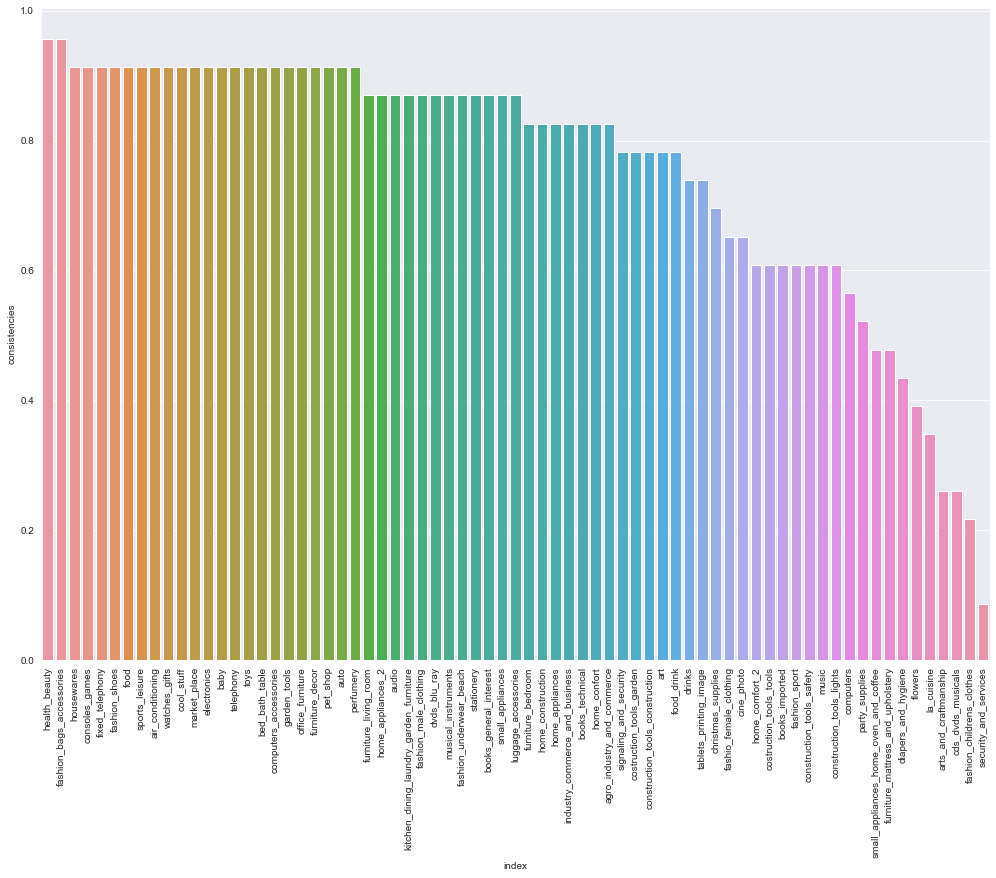

In [165]:
consistency_df= pd.DataFrame(dic, index=['consistencies']).T.sort_values('consistencies', ascending = False).reset_index()

plt.figure(figsize = (17, 12))
sns.barplot(x='index', y='consistencies', data= consistency_df)

plt.xticks(rotation = 90)

set(top_17) - set(consistency_df['index'][:18])

In [166]:
# CHECKING THE PRODUCTS THAT HAVE RETURNING CUSTOMERS
# THIS IS TO UNDERSTAND WHY CUSTOMERS DON'T RETURN FROM A PRODUCT STAND POINT OR BASED ON THE NATURE OF THE PRODUCTS

customer_product_analysis = orders_mod[['customer_id', 'customer_unique_id', 'product_category_name_english']]

customer_product_analysis.head()

,customer_id,customer_unique_id,product_category_name_english
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,housewares
1,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,perfumery
2,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,auto
3,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,pet_shop
4,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,stationery


In [167]:
customer_df = customer_product_analysis.groupby('product_category_name_english')['customer_unique_id'].agg({'list of customers': lambda x: len(x.to_list()),
                                                                                             'set of customers': lambda x: len(set(x.to_list()))}).reset_index()

customer_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


,product_category_name_english,list of customers,set of customers
0,agro_industry_and_commerce,182,181
1,air_conditioning,252,250
2,art,199,199
3,arts_and_craftmanship,22,20
4,audio,348,347


In [168]:
customer_df['difference'] = customer_df['list of customers'] - customer_df['set of customers']

customer_df = customer_df.sort_values('difference', ascending = False)

display(customer_df.head(17))

set(top_17) - set(customer_df['product_category_name_english'][:18].to_list())

,product_category_name_english,list of customers,set of customers,difference
7,bed_bath_table,9324,9057,267
65,sports_leisure,7688,7485,203
43,health_beauty,8804,8648,156
15,computers_accessories,6666,6534,132
39,furniture_decor,6334,6209,125
70,watches_gifts,5606,5530,76
28,fashion_bags_accessories,1855,1791,64
44,home_appliances,764,703,61
49,housewares,5823,5763,60
68,telephony,4189,4142,47


{'computers', 'office_furniture'}

In [169]:
customer_df.tail(5)

,product_category_name_english,list of customers,set of customers,difference
27,fashio_female_clothing,38,38,0
29,fashion_childrens_clothes,6,6,0
32,fashion_sport,27,27,0
33,fashion_underwear_beach,121,121,0
35,flowers,27,27,0


- `The products with the most returns from their overall customers are listed above`  


- `The numbers are not quite impressive all the same`  


- `All the products with high amount of returning customers are in the top_17 most effective products but two of them`  


- `Most of the products sold in OLIST don't appear to be  products that would be used for a while before replacing. The last five products with no returning customers at all are products that should have returing customers`

In [170]:
city_month = new_price_analysis.groupby('year_month')['customer_city'].agg({'list of cities per month':lambda x: list(x.value_counts().index),
                                                            'Number of cities per month': lambda x: len(x.value_counts())}).reset_index()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


In [171]:
city_month['cummulative cities'] = city_month['list of cities per month']

for i in range(1, 23):
    city_month['cummulative cities'][i] = list(set(city_month['cummulative cities'][i] + city_month['cummulative cities'][i - 1]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [173]:
city_month['number of cummulative cities'] = city_month['cummulative cities'].apply(lambda x: len(x))

city_month[['year_month', 'Number of cities per month', 'number of cummulative cities']]

,year_month,Number of cities per month,number of cummulative cities
0,2016-09,1,1
1,2016-10,151,152
2,2016-12,1,152
3,2017-01,356,436
4,2017-02,612,820
5,2017-03,776,1212
6,2017-04,768,1498
7,2017-05,968,1840
8,2017-06,878,2080
9,2017-07,983,2310


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


<AxesSubplot:>

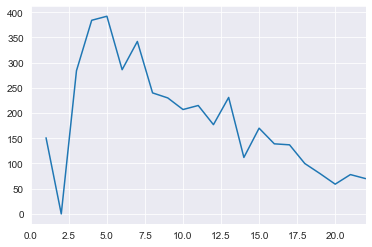

In [174]:
# differencing the cummulative cities that OLIST spreads to per month to know if it increases at a constant rate.
city_month['number of cummulative cities'].rolling(2).apply(lambda x : x[1] - x[0]).plot()

- **`It appears that spread increases at a rate that decreases with time(month). As the months go by, the addition to the previous cities decrease.`**

<AxesSubplot:xlabel='Number of cities per month', ylabel='number of cummulative cities'>

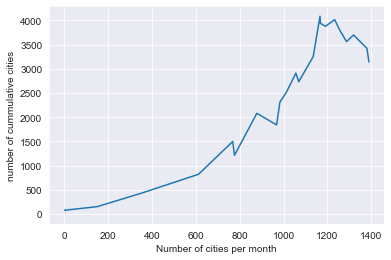

In [175]:
sns.lineplot(x='Number of cities per month', y='number of cummulative cities', data=city_month)

- **`The relationship between sales gotten from cities per month, peculiar to the month, increases with increase in the cumulative number of cities OLIST has spread to. It then reaches a point and begins to decline`**

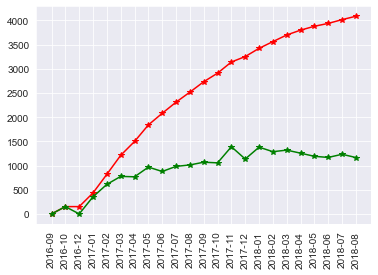

In [176]:
# plotting the increase in customer cities per month and the cummulative cities that OLIST has reached since the inception
plt.plot(city_month['year_month'], city_month['number of cummulative cities'], '*-', color='red')

plt.plot(city_month['year_month'], city_month['Number of cities per month'], '*-', color='green')

plt.xticks(rotation = 90)

plt.show()

#### OBSERVATIONS
- **`The spread or areas where OLIST customers are located as the months go by, generally follow an increasing trend, somewhat like a parabola as they add up cumulatively`**  


- **`The monthly customer's cities started increasing initially then it became somewhat steady. The rate at which it increases is significantly smaller than the rate at which OLIST spreads across cities`**

In [177]:
new_price_analysis.columns

Index(['order_id', 'order_item_id', 'price', 'seller_id', 'order_status',
       'order_purchase_timestamp', 'product_category_name_english',
       'product_category_name', 'customer_state', 'customer_city',
       'total_price', 'year_month'],
      dtype='object')

In [194]:
df = new_price_analysis[['order_purchase_timestamp', 'total_price']].set_index('order_purchase_timestamp').resample('D').sum()

In [195]:
df.shape

(714, 1)

In [196]:
df.sort_values('total_price', ascending = False).head(70)

,total_price
order_purchase_timestamp,
2017-11-24,149751.66
2017-11-25,60257.68
2018-05-16,54699.90
2018-08-06,54428.79
2018-05-07,52911.64
2018-05-14,52700.31
2018-05-10,51256.78
2018-06-11,49679.06
2018-04-09,48866.43


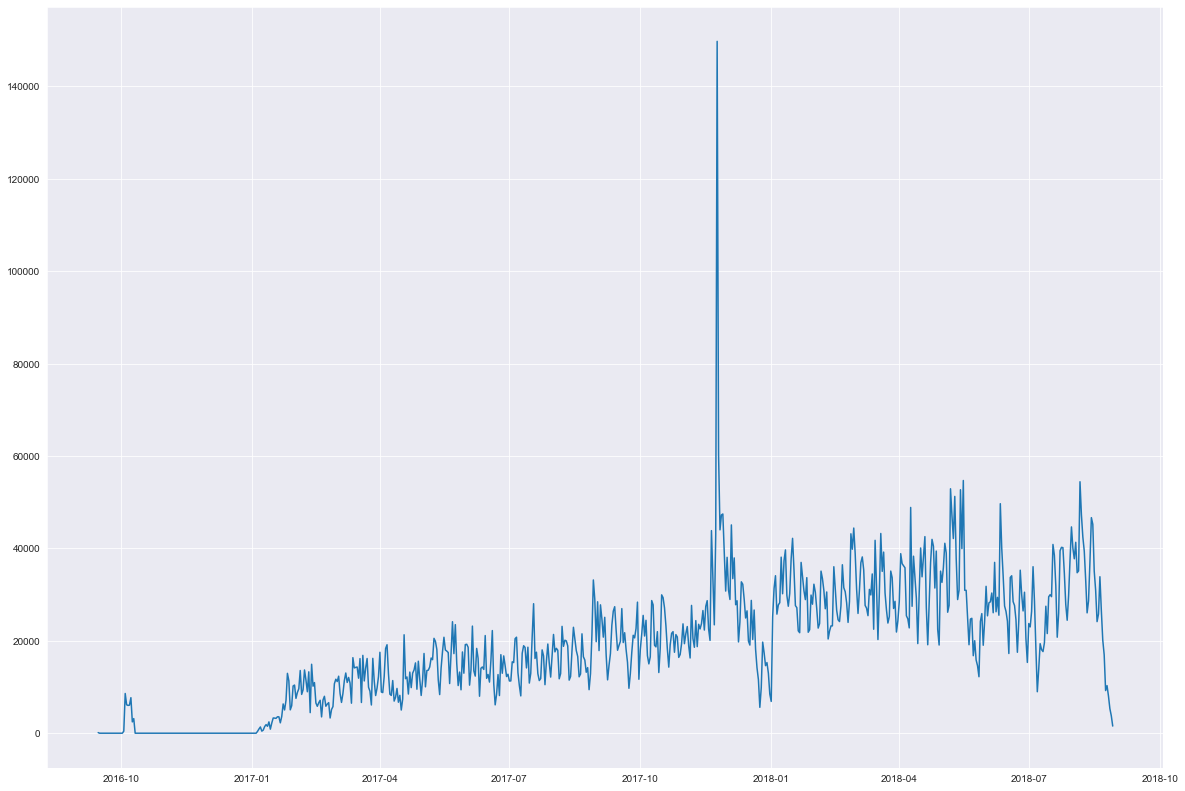

In [138]:
plt.figure(figsize = (20, 14))
plt.plot(df.index, df['total_price'])


- **` There happens to be a huge spike in the total sales on a particular day, 24th November, 2017`**

- **`No wonder November, 2017 gave the highest sales in the monthly analysis`**

- **`The spike needs more investigation`**

In [198]:
new_price_analysis[['order_purchase_timestamp', 'total_price']].set_index('order_purchase_timestamp').resample('D').count().sort_values('total_price', ascending = False).head(70)

,total_price
order_purchase_timestamp,
2017-11-24,1147
2017-11-25,487
2017-11-27,395
2017-11-26,382
2017-11-28,372
2018-08-06,363
2018-05-07,363
2018-05-14,355
2018-08-07,353


- **`It appears that the number of sales made on that particular day is significantly larger than the rest`**

In [178]:
new_price_analysis['day'] = new_price_analysis['order_purchase_timestamp'].apply(lambda x: ''.join(str(x).split(' ')[0]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [197]:
# Checking if the orders are duplicated. This should account for the large number of orders if they are duplicated

l_1 = len(new_price_analysis[new_price_analysis['day'] == '2017-11-24'])
l_2 = len(new_price_analysis[new_price_analysis['day'] == '2017-11-24'].drop_duplicates('order_id'))

assert l_1 == l_2

In [203]:
calendar.day_name[df.sort_values('total_price', ascending = False).head(70)['total_price'].idxmax().weekday()]

'Friday'

- **`The day in question is a friday. It could be that they had a black friday where they slashed prices. This should be looked into`**

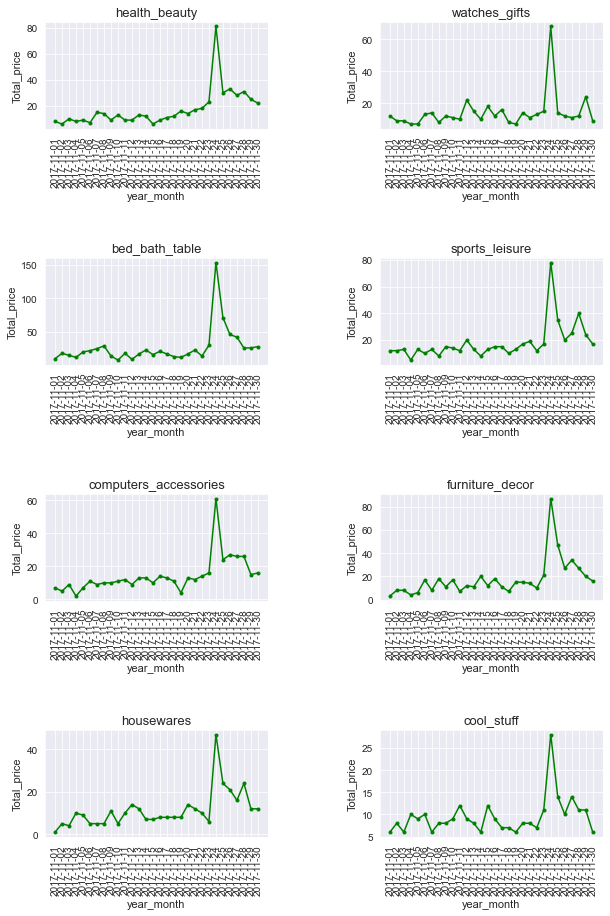

In [221]:
category_count = new_price_analysis.groupby(['product_category_name_english', 'day'])['price'].count().reset_index()
category_count = category_df[category_df['day'].str.contains('2017-11')]
fig = plt.figure(figsize = (10, 15))
fig.subplots_adjust(hspace=1.2, wspace=0.5)
for i, cat in enumerate(top_17[:8]):
    ax = plt.subplot(4, 2, i+1)
    data = category_count[category_count['product_category_name_english']== cat]
    ax.plot(data['day'], data['price'], '.-', color='green')
    #ax.bar(data['day'], data['price'], width = 0.3, color='red', linestyle='--')
    plt.xticks(rotation=90)
    plt.title(cat, fontsize= 13)
    plt.xlabel('year_month', fontsize=11)
    plt.ylabel('Total_price', fontsize=11)